# Google Play Store Apps — Overview

## Dataset Background
**Context**  
Public datasets for Apple’s App Store are plentiful, but comparable Google Play data are scarce. The Play Store’s dynamic page loading (e.g., jQuery) complicates scraping; this dataset overcomes those hurdles to capture a broad snapshot of the Android ecosystem.

**Content**  
Each row represents one app and includes features such as category, rating, size, price, and install count.

**Acknowledgements**  
All information was scraped directly from Google Play Store pages.

**Why It Matters**  
Analyzing this data can reveal actionable insights for developers and publishers aiming to thrive in the Android marketplace.

---

## Problem Statement
**Main Question**  
*Which apps—and which characteristics—achieve the highest user ratings?*

### Supporting Questions
- **Ratings & Downloads**  
  - Which categories attract the most installs?  
  - How are ratings distributed across categories?  
  - What relationships exist among installs, app size, and ratings?  
- **Free vs. Paid**  
  - Do paid apps receive better ratings than free ones?  
  - How does pricing influence popularity?  
- **Developer Optimization**  
  - Which attributes (size, category, price) correlate with higher ratings?  
  - Are there under‑performing categories that deserve attention?  
- **Category Impact**  
  - How strongly does each category contribute to our target metrics?

Answering these questions will help improve user satisfaction, refine monetization strategies, and guide marketing or product decisions.

---

## Project Objectives
**Primary Goal**  
Analyze the dataset and build models that predict key outcomes such as user rating, install volume, and revenue potential.

**Specific Objectives**
1. Detect patterns linking app features (category, size, reviews, price) to success metrics.  
2. Train predictive models that estimate future performance.  
3. Cluster apps into market segments based on shared characteristics.

---

## Machine‑Learning Approaches
- **Regression** – Predict continuous targets (e.g., rating, installs).  
- **Classification** – Distinguish apps by monetization type (Free vs. Paid).  
- **Clustering** – Group apps with similar profiles (size, price, rating, etc.).



# Inspecting the Data Set

In [1]:

# Data
import numpy as np 
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm # for a color pallete
import seaborn as sns
from wordcloud import WordCloud

# for models
import category_encoders as ce
import sklearn 

# to ignore warnings because they clutter my notebook
import warnings 
warnings.filterwarnings("ignore" ,category=FutureWarning) 

# load the data set
AppStoreData = pd.read_csv('googleplaystore.csv')



## Overview of the Dataset

In [2]:
# insepct the data , to get the number of rows and columns
AppStoreData.shape

(10841, 13)

In [3]:
AppStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
AppStoreData.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
# Columns are containing spaces.Replace spaces with "_"
AppStoreData.columns = AppStoreData.columns.str.replace(" ","_")
AppStoreData.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [6]:
#View the first few rows to understand the structure and columns.
AppStoreData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# i did some searching beforehand, and i found that there is a wrong entery.

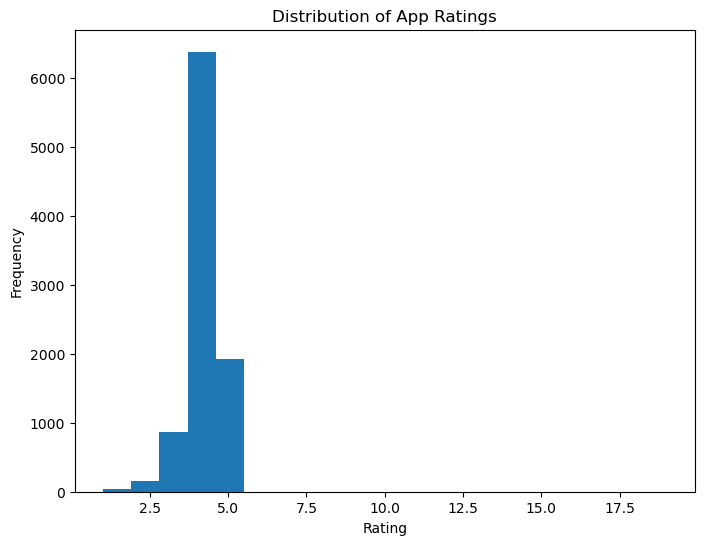

In [8]:
AppStoreData['Rating'].plot(kind='hist', bins=20, figsize=(8, 6))
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [9]:
AppStoreData[AppStoreData['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
AppStoreData = AppStoreData.drop(10472)

In [11]:
AppStoreData[AppStoreData['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


# EDA


## seeing types of data we are working with

## handle Missing Data 

In [12]:
AppStoreData.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64

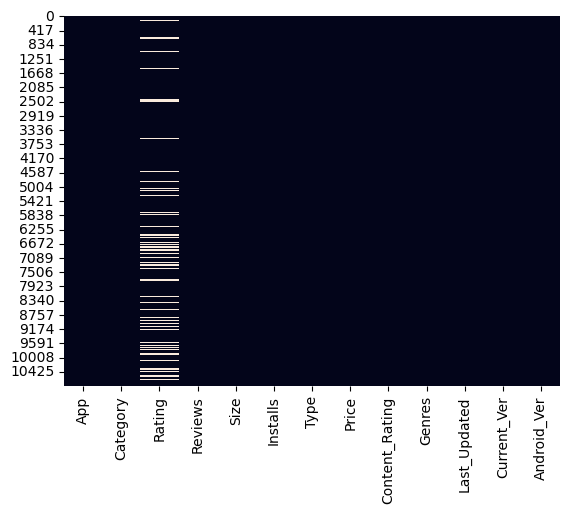

In [13]:
# Visualize Missing Data


sns.heatmap(AppStoreData.isnull(), cbar=False)
plt.show()

In [14]:
# we notice that we have rating missing, so we will first see the percentage compared to our total
missing_percentage = (AppStoreData.isnull().sum() / len(AppStoreData)) * 100
missing_percentage

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009225
Price              0.000000
Content_Rating     0.000000
Genres             0.000000
Last_Updated       0.000000
Current_Ver        0.073801
Android_Ver        0.018450
dtype: float64

In [15]:
# we see that the percentage is 13% so we have options to fix it, and il go with replacing the missing values with the mean
# Replace missing values in 'Rating' with the column mean
AppStoreData['Rating'] = AppStoreData['Rating'].fillna(AppStoreData['Rating'].mean())


In [16]:
AppStoreData.isnull().sum() #now we can see its fixed

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

### for type we have one missing value, i can replace it manually, since the app is already 0, then the type is free

In [17]:
AppStoreData[AppStoreData['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,4.191757,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [18]:
AppStoreData.loc[9148, 'Type'] = 'Free'

In [19]:
AppStoreData.isnull().sum() #now we can see its fixed

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

## Data Cleaning 

In [20]:
AppStoreData.duplicated().sum()

483

In [21]:
AppStoreData = AppStoreData.drop_duplicates()

In [22]:
AppStoreData.duplicated().sum()

0

## for price 

In [23]:
AppStoreData.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
# Correct Data Types (Example: Price)
AppStoreData['Price'] = AppStoreData['Price'].str.replace('$', '', regex=False).astype(float)

In [25]:
# now it ran correctly, so we assume that there is no other wrong info for now. 
AppStoreData.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## for reviews 

In [26]:
AppStoreData.Reviews.describe()

count     10357
unique     6001
top           0
freq        593
Name: Reviews, dtype: object

In [27]:
AppStoreData["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [28]:
AppStoreData.Reviews = AppStoreData.Reviews.astype("int64")
AppStoreData.Reviews.describe().round()

count       10357.0
mean       405905.0
std       2696778.0
min             0.0
25%            32.0
50%          1680.0
75%         46416.0
max      78158306.0
Name: Reviews, dtype: float64

## for Size

In [29]:
print(len(AppStoreData["Size"].unique()))
AppStoreData["Size"].unique()

461


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [30]:
# Replace 'M' with '000', remove 'k', replace 'Varies with device' with NaN
AppStoreData['Size'] = AppStoreData['Size'].str.replace('M', '000').str.replace('k', '').replace('Varies with device', np.nan)
# Remove non-numeric characters (except '.')
AppStoreData['Size'] = AppStoreData['Size'].replace('[^\d.]', '', regex=True)
# Convert to numeric, errors='coerce' will replace non-convertible values with NaN
AppStoreData['Size'] = pd.to_numeric(AppStoreData['Size'], errors='coerce')
# Replace NaN with 0
AppStoreData['Size'] = AppStoreData['Size'].fillna(0)

In [31]:
for i in AppStoreData['Size']:
    if i < 10:
        AppStoreData['Size']=AppStoreData['Size'].replace(i,i*1000)
AppStoreData['Size']=AppStoreData['Size']/1000

In [32]:
AppStoreData["Size"]

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10357, dtype: float64

In [33]:
Size_median = AppStoreData[AppStoreData["Size"]!= "Varies with device"]["Size"].astype(float).median()
Size_median

9.1

In [34]:
AppStoreData["Size"].replace("Varies with device", Size_median, inplace = True)
AppStoreData["Size"] = pd.to_numeric(AppStoreData["Size"])

## for installs

In [35]:
AppStoreData.Installs.unique() # now we will work with installs


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [36]:
# Clean and convert Installs column
AppStoreData['Installs'] = AppStoreData['Installs'].str.replace(',', '').str.replace('+', '')

In [37]:
AppStoreData.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

## For Type 

In [38]:
AppStoreData['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
AppStoreData['Type'] = LabelEncoder().fit_transform(AppStoreData['Type'])

In [40]:
AppStoreData['Type'].unique()

array([0, 1])

## for Android Ver

In [41]:
AppStoreData['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [42]:
additinal_item_android = ['and up' , 'W' , '- 7.1.1','- 8.0','.' , '- 60','0',' ' ]
target_col_android = ['Android_Ver' ]
for item in additinal_item_android:
    for col in target_col_android:
        AppStoreData[col] = AppStoreData[col].str.replace(item,'')

In [43]:
AppStoreData['Android_Ver'].unique()

array(['43', '42', '44', '23', '3', '41', '4', '233', 'Varieswithdevice',
       '22', '5', '6', '16', '15', '21', '7', '51', '2', '32', '71', '8',
       '31', nan, '1'], dtype=object)

In [44]:
def aggregate_values(dataset, agg_list, target_col, android_vers):

    for item in agg_list:
        for col in target_col:
            for ver in android_vers:
                AppStoreData[col] = AppStoreData[col].str.replace(item, ver)

                
target_col_android = ['Android_Ver'] 

# Define your aggregation lists and target columns
agg_android_one = ['16', '15']
android_version_one = ['1']

agg_android_two = ['23','233','22','21']
android_version_two = ['2']

agg_android_three = ['32', '31'] 
android_version_three = ['3']

agg_android_four = ['43', '42' ,'44', '41']
android_version_four = ['4']

agg_android_five = ['51']
android_version_five = ['5']

agg_android_seven = ['71']
android_version_seven = ['7']

# Call the function for the first set of values
aggregate_values(AppStoreData, agg_android_one, target_col_android, android_version_one)

# Call the function for the second set of values
aggregate_values(AppStoreData, agg_android_two, target_col_android, android_version_two)

# Call the function for the third set of values
aggregate_values(AppStoreData, agg_android_three, target_col_android, android_version_three)

# Call the function for the four set of values
aggregate_values(AppStoreData, agg_android_four, target_col_android, android_version_four)

# Call the function for the five set of values
aggregate_values(AppStoreData, agg_android_five, target_col_android, android_version_five)

# Call the function for the seven set of values
aggregate_values(AppStoreData, agg_android_seven, target_col_android, android_version_seven)

In [45]:
AppStoreData['Android_Ver'].unique()

array(['4', '2', '3', '23', 'Varieswithdevice', '5', '6', '1', '7', '8',
       nan], dtype=object)

In [46]:

agg_android_two = ['23']
android_version_two = ['2']

aggregate_values(AppStoreData, agg_android_two, target_col_android, android_version_two)

In [47]:
AppStoreData['Android_Ver'].unique()

array(['4', '2', '3', 'Varieswithdevice', '5', '6', '1', '7', '8', nan],
      dtype=object)

In [48]:
nan_count_and = AppStoreData['Android_Ver'].isna().sum()
print(f"Number of NaN values in the 'Android Ver' column: {nan_count_and}")

Number of NaN values in the 'Android Ver' column: 2


In [49]:
AppStoreData.dropna(subset=['Android_Ver'], inplace=True)

In [50]:
AppStoreData['Android_Ver'].unique()

array(['4', '2', '3', 'Varieswithdevice', '5', '6', '1', '7', '8'],
      dtype=object)

In [51]:
# Verify the changes
print(AppStoreData.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type                int32
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object


## for Category

In [52]:

# Value Counts for a Categorical Column
AppStoreData['Category'].value_counts()


Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [53]:
AppStoreData.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## for Genres 

In [54]:
AppStoreData.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [55]:
len(AppStoreData.Genres.unique())

119

In [56]:
AppStoreData.Genres = AppStoreData.Genres.str.split(";").str[0] # why did we do this? its because we want to reduce the number of unique instances

In [57]:
len(AppStoreData.Genres.unique())

48

In [58]:
AppStoreData.Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [59]:
AppStoreData.Genres.value_counts()

Genres
Tools                      843
Entertainment              628
Education                  610
Business                   427
Medical                    408
Productivity               407
Personalization            386
Lifestyle                  374
Action                     371
Sports                     368
Communication              367
Finance                    360
Photography                322
Health & Fitness           308
Social                     280
News & Magazines           264
Casual                     263
Travel & Local             237
Arcade                     234
Books & Reference          233
Shopping                   224
Simulation                 216
Dating                     196
Video Players & Editors    178
Puzzle                     162
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     119
Strategy                   109
Educational                106
Adventure                   91
A

In [60]:
# we see music and audio, we will include it into msuic

In [61]:
AppStoreData.Genres.replace("Music & Audio", "Music", inplace = True)

In [62]:
AppStoreData.Genres.value_counts()

Genres
Tools                      843
Entertainment              628
Education                  610
Business                   427
Medical                    408
Productivity               407
Personalization            386
Lifestyle                  374
Action                     371
Sports                     368
Communication              367
Finance                    360
Photography                322
Health & Fitness           308
Social                     280
News & Magazines           264
Casual                     263
Travel & Local             237
Arcade                     234
Books & Reference          233
Shopping                   224
Simulation                 216
Dating                     196
Video Players & Editors    178
Puzzle                     162
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     119
Strategy                   109
Educational                106
Adventure                   91
A

## Descriptive Statistics

In [63]:
# Summary Statistics for Numerical Columns
AppStoreData.describe()

,Rating,Reviews,Size,Type,Price
count,10355.000000,1.035500e+04,10355.000000,10355.000000,10355.000000
mean,4.188375,4.059830e+05,18.144660,0.073781,1.030856
std,0.484054,2.697032e+06,22.145675,0.261426,16.280194
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.100000,3.200000e+01,2.700000,0.000000,0.000000
50%,4.200000,1.686000e+03,9.100000,0.000000,0.000000
75%,4.500000,4.646050e+04,26.000000,0.000000,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000,400.000000


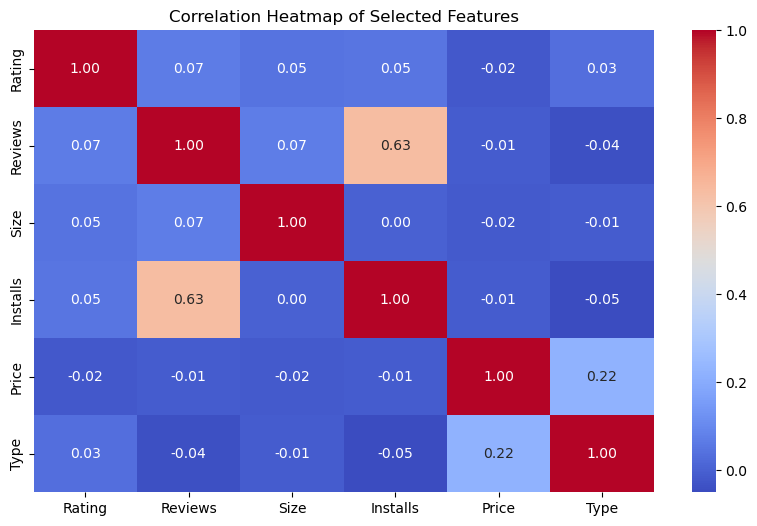

In [64]:
#3.2 Correlation Heatmap
#Create a heatmap to visualize the correlation between numerical features .

# Select the target variable and 5 numerical features
features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price','Type']
selected_data = AppStoreData[features]

# Compute the correlation matrix
corr_matrix = selected_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [65]:
# we can see that there is a high correlation between instals and reviews, but for the rest, all is good.

# Feature engineering

In [66]:
#**Extract Year from 'Last Updated'**
AppStoreData['Last_Updated'] = pd.to_datetime(AppStoreData['Last_Updated'], errors='coerce')
AppStoreData['Last_Updated_Year'] = AppStoreData['Last_Updated'].dt.year
AppStoreData['Last_Updated_Month'] = AppStoreData['Last_Updated'].dt.month

AppStoreData = AppStoreData.drop('Last_Updated', axis=1)

In [67]:
AppStoreData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Current_Ver,Android_Ver,Last_Updated_Year,Last_Updated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Everyone,Art & Design,1.0.0,4,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,Everyone,Art & Design,2.0.0,4,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Everyone,Art & Design,1.2.4,4,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,Teen,Art & Design,Varies with device,4,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Everyone,Art & Design,1.1,4,2018,6


In [68]:
AppStoreData.describe()

,Rating,Reviews,Size,Type,Price,Last_Updated_Year,Last_Updated_Month
count,10355.000000,1.035500e+04,10355.000000,10355.000000,10355.000000,10355.000000,10355.000000
mean,4.188375,4.059830e+05,18.144660,0.073781,1.030856,2017.382810,6.397296
std,0.484054,2.697032e+06,22.145675,0.261426,16.280194,1.112841,2.606390
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,2010.000000,1.000000
25%,4.100000,3.200000e+01,2.700000,0.000000,0.000000,2017.000000,5.000000
50%,4.200000,1.686000e+03,9.100000,0.000000,0.000000,2018.000000,7.000000
75%,4.500000,4.646050e+04,26.000000,0.000000,0.000000,2018.000000,8.000000
max,5.000000,7.815831e+07,100.000000,1.000000,400.000000,2018.000000,12.000000


# Data visualsitation 

In [69]:
# here is color for asthethic purposes 
unique_versions = AppStoreData['Android_Ver'].nunique()

In [70]:
colors = cm.viridis(np.linspace(0, 1, unique_versions))  # 'viridis' is a built-in colormap
# Generate a colormap


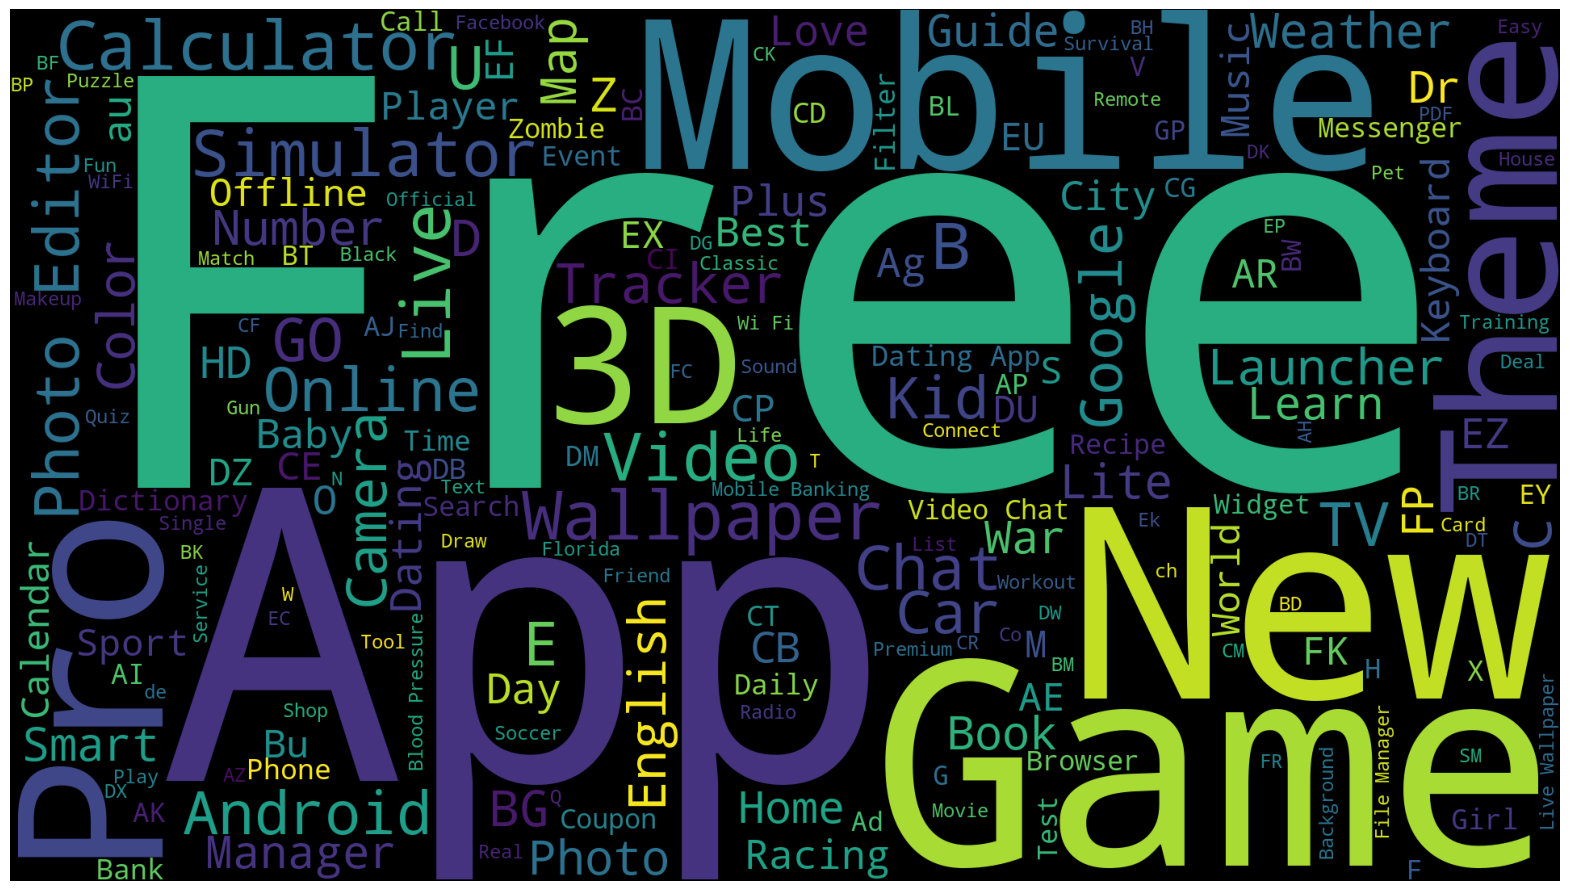

In [71]:
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(AppStoreData.App))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [72]:
# top 10 rated apps with 5.0 rating
AppStoreData[AppStoreData['Rating'] == 5.0].sort_values(by='Reviews', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Current_Ver,Android_Ver,Last_Updated_Year,Last_Updated_Month
10357,Ríos de Fe,LIFESTYLE,5.0,141,15.0,1000,0,0.0,Everyone,Lifestyle,1.8,4,2018,3
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.3,1000,0,0.0,Everyone,Finance,2.1.0,4,2018,8
8058,Oración CX,LIFESTYLE,5.0,103,3.8,5000,0,0.0,Everyone,Lifestyle,5.1.10,4,2017,9
6823,Barisal University App-BU Face,FAMILY,5.0,100,10.0,1000,0,0.0,Everyone,Education,3.1.1,4,2018,5
9496,Master E.K,FAMILY,5.0,90,0.0,1000,0,0.0,Everyone,Education,1.5.0,4,2017,8
7506,CL REPL,TOOLS,5.0,47,17.0,1000,0,0.0,Everyone,Tools,1.0.19,4,2018,4
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2.8,100,0,0.0,Everyone,Photography,1.0,4,2018,1
9517,Ek Vote,PRODUCTIVITY,5.0,43,6.2,500,0,0.0,Everyone,Productivity,1.1,4,2017,11
7842,CS & IT Interview Questions,FAMILY,5.0,43,3.3,1000,0,0.0,Everyone,Education,1.1,4,2018,3
5196,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43,2.3,100,0,0.0,Everyone,News & Magazines,1.0,4,2018,6


### Which category's Has the most reviews

In [73]:
# to find which category app has the maximum number of reviews
AppStoreData.groupby('Category')['Reviews'].max().sort_values(ascending=False).head(10)

Category
SOCIAL                78158306
COMMUNICATION         69119316
GAME                  44893888
FAMILY                44881447
TOOLS                 42916526
VIDEO_PLAYERS         25655305
SPORTS                14184910
NEWS_AND_MAGAZINES    11667403
PHOTOGRAPHY           10859051
TRAVEL_AND_LOCAL       9235373
Name: Reviews, dtype: int64

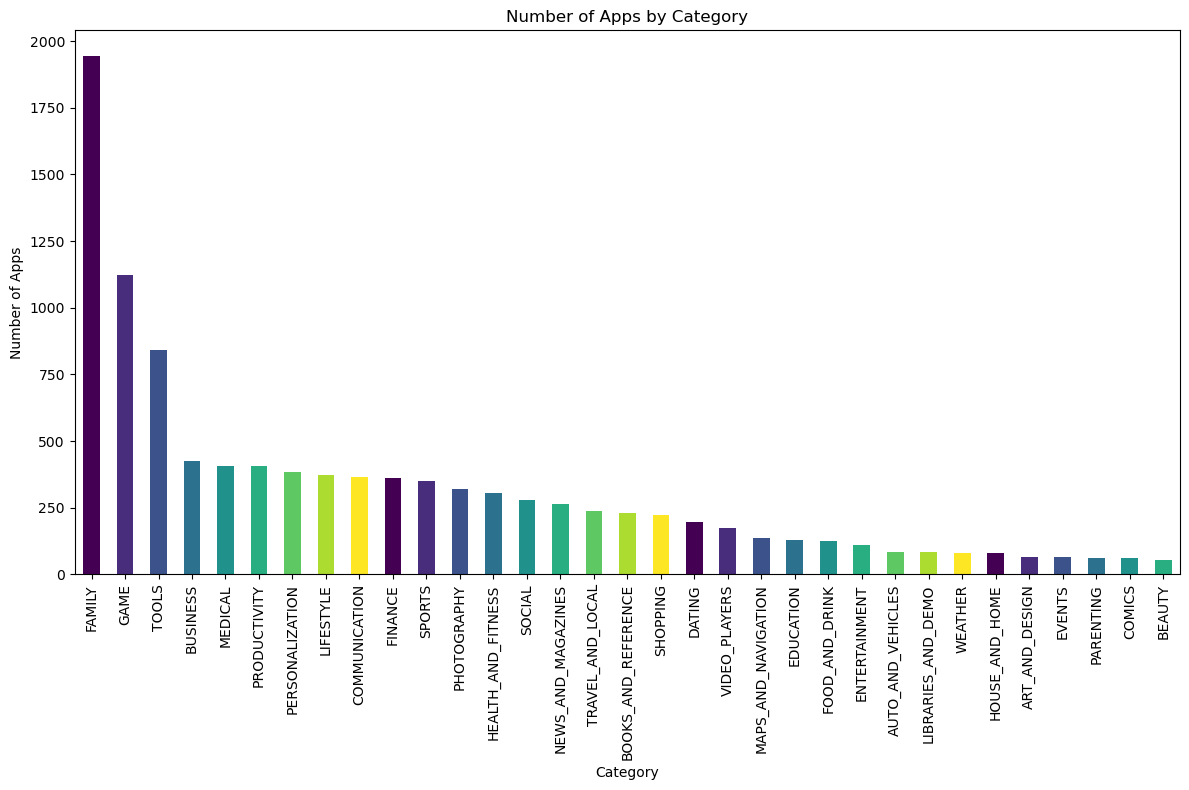

In [74]:
AppStoreData['Category'].value_counts().plot(kind='bar', figsize=(12, 8), color = colors)
plt.title("Number of Apps by Category")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

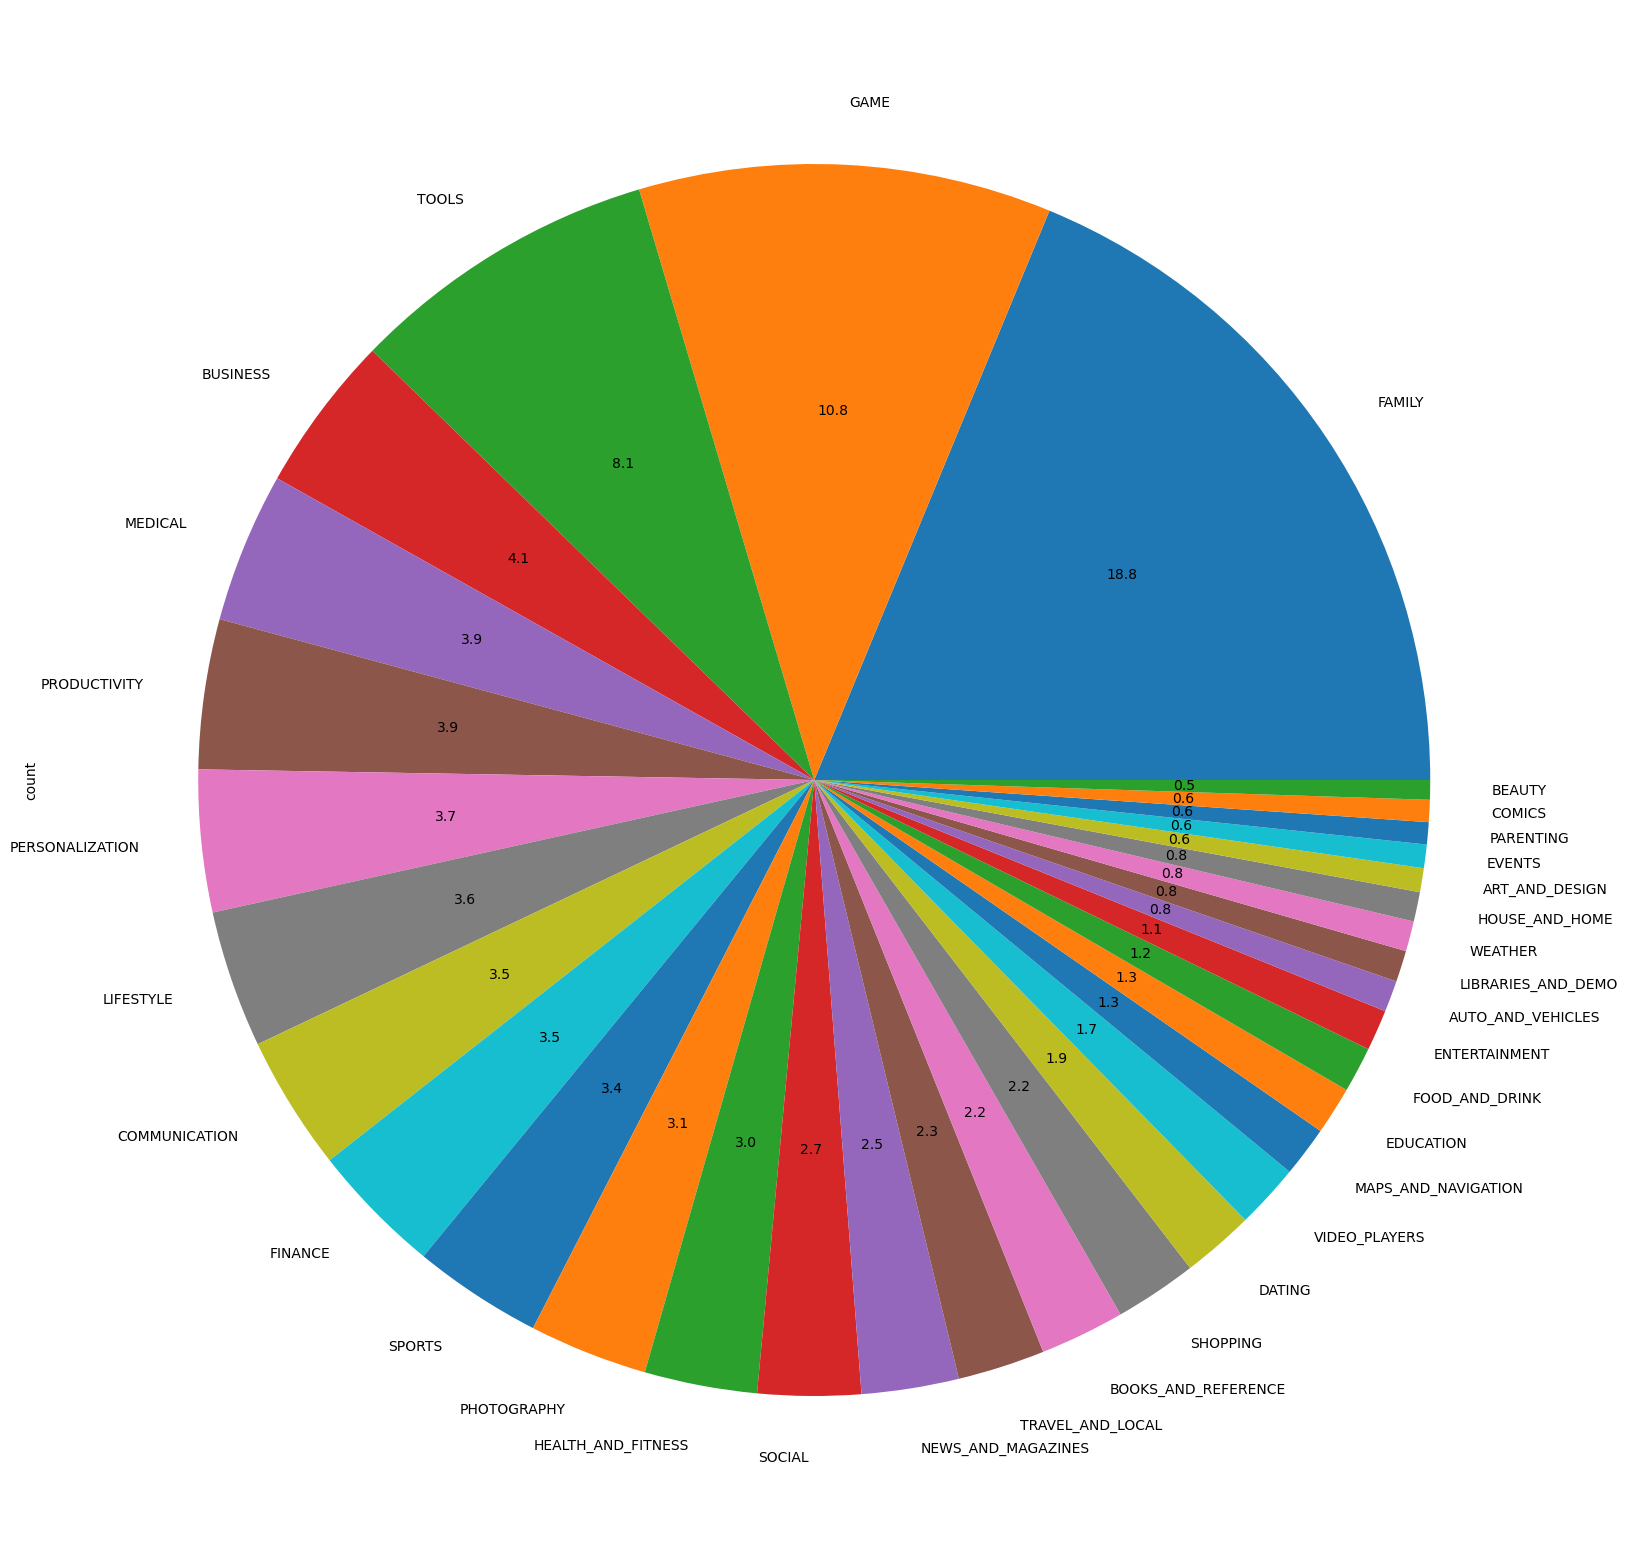

In [75]:
AppStoreData['Category'].value_counts().plot.pie(y=AppStoreData['Category'], figsize=(100,20), autopct='%1.1f')

<Axes: xlabel='Genres'>

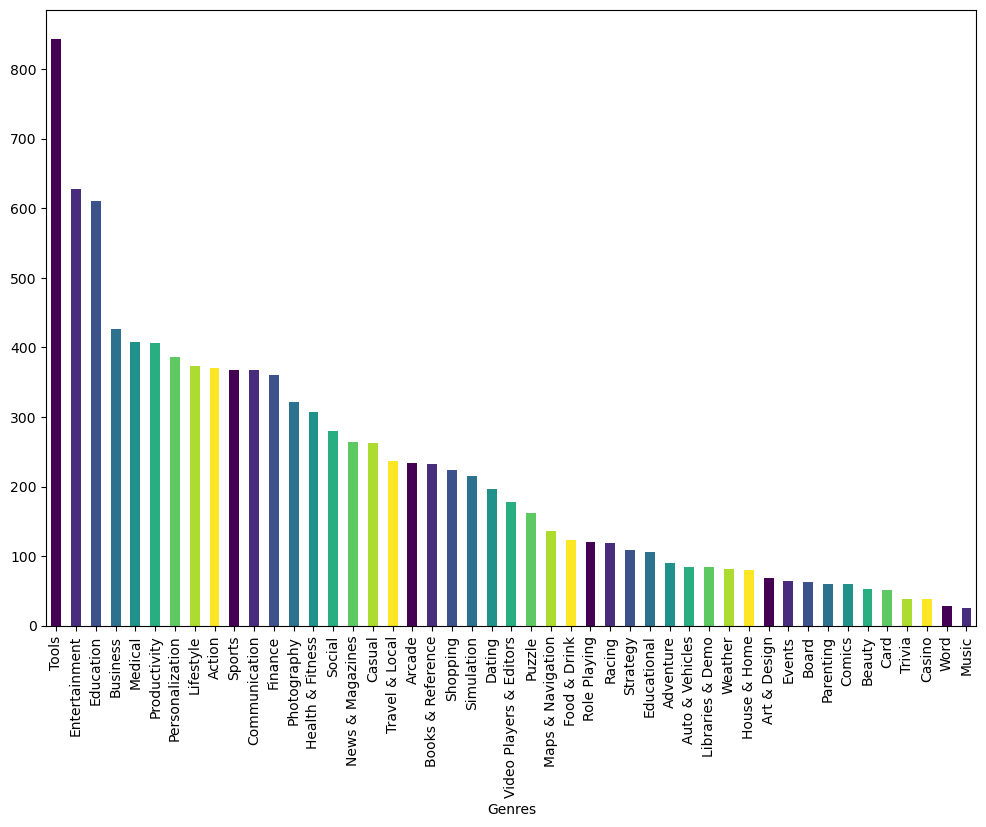

In [76]:
plt.figure(figsize=(12,8))
AppStoreData["Genres"].value_counts().plot.bar(color =colors )

<Axes: xlabel='Type'>

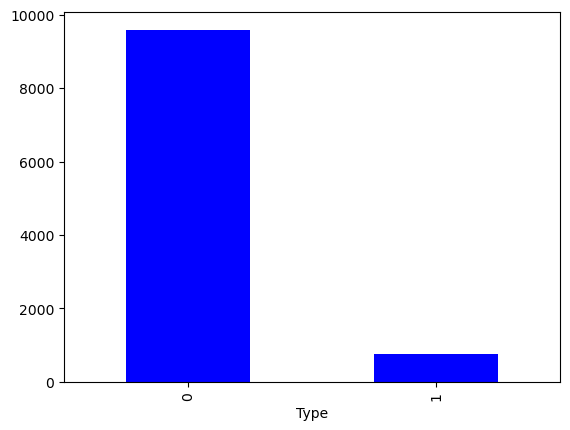

In [77]:
AppStoreData["Type"].value_counts().plot.bar(color ="blue")

<Axes: xlabel='Content_Rating'>

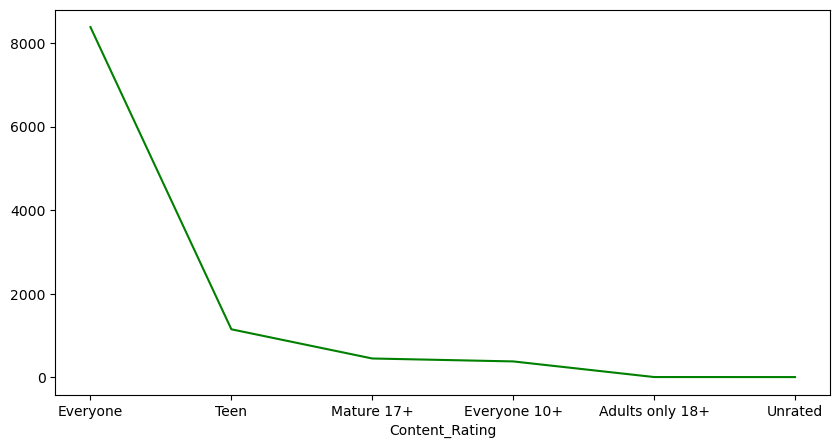

In [78]:
plt.figure(figsize=(10,5))
AppStoreData["Content_Rating"].value_counts().plot.line(color ="green")

<Axes: xlabel='Type', ylabel='Rating'>

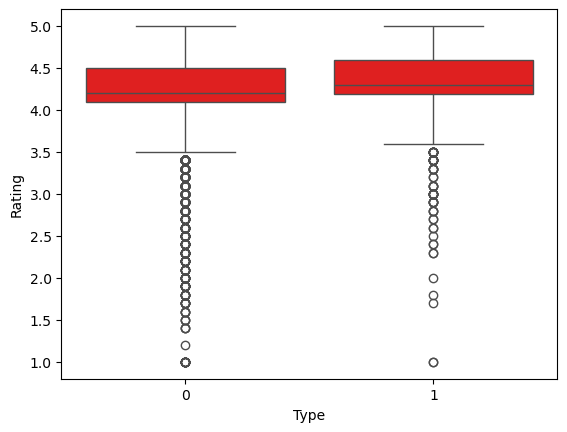

In [79]:
sns.boxplot(x = "Type", y = "Rating", data = AppStoreData, color = "red")

<Axes: xlabel='Content_Rating', ylabel='Rating'>

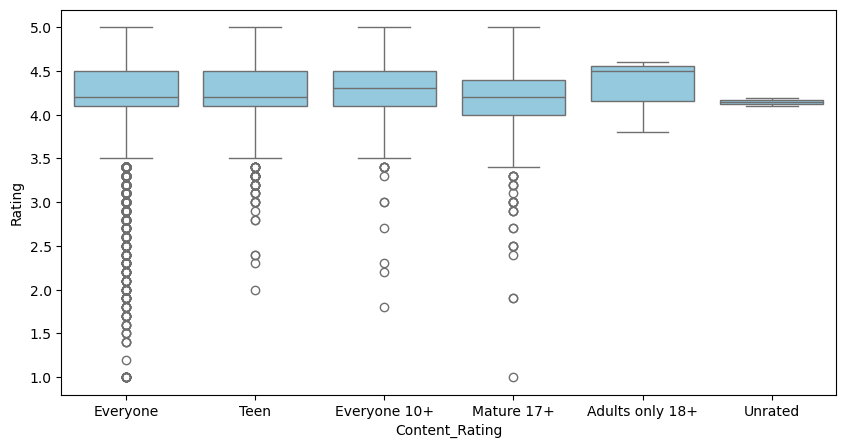

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "Content_Rating", y = "Rating", data = AppStoreData, color = "skyblue")


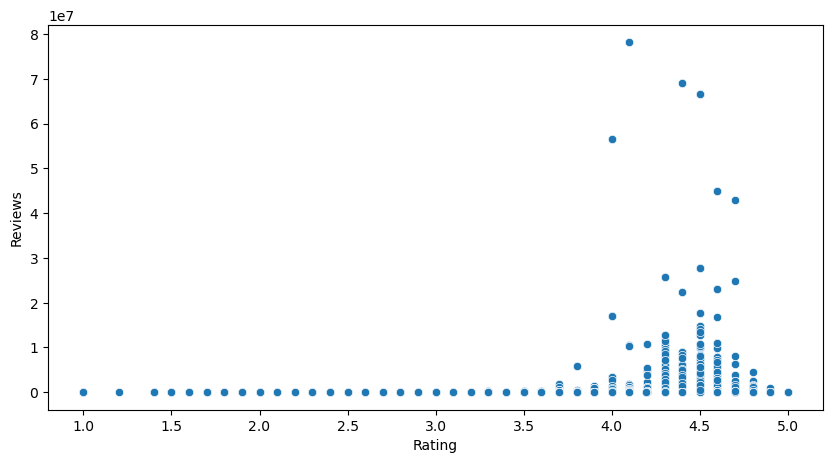

In [81]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Rating', y='Reviews', data=AppStoreData)
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

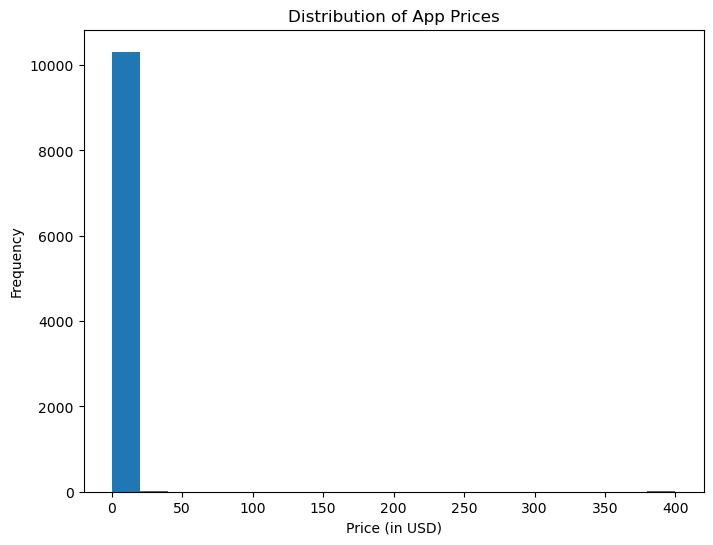

In [82]:
AppStoreData['Price'].plot(kind='hist', bins=20, figsize=(8, 6))
plt.title("Distribution of App Prices")
plt.xlabel("Price (in USD)")
plt.ylabel("Frequency")
plt.show()

In [83]:
#we can see that visualising with the free apps skews the data a lot, so we will seperate them and see which are free which are paid.
free_apps = AppStoreData[AppStoreData['Price'] == 0]
paid_apps = AppStoreData[AppStoreData['Price'] > 0]

In [84]:
len(paid_apps)

764

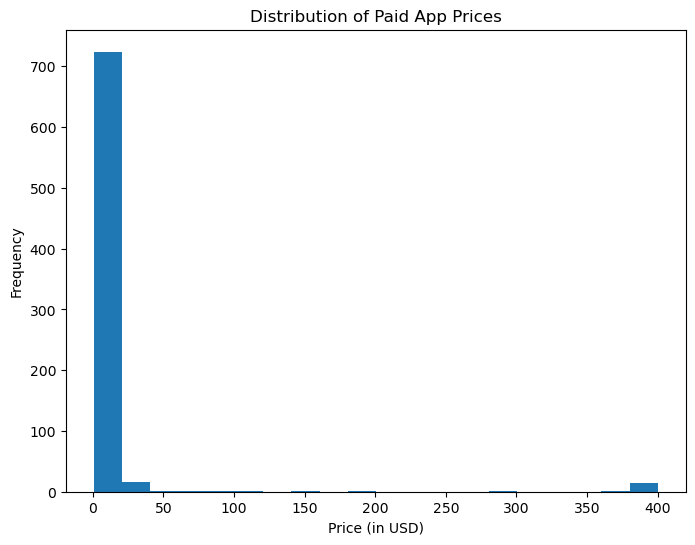

In [85]:
# Plot the price distribution for paid apps
paid_apps['Price'].plot(kind='hist', bins=20, figsize=(8, 6))
plt.title("Distribution of Paid App Prices")
plt.xlabel("Price (in USD)")
plt.ylabel("Frequency")
plt.show()


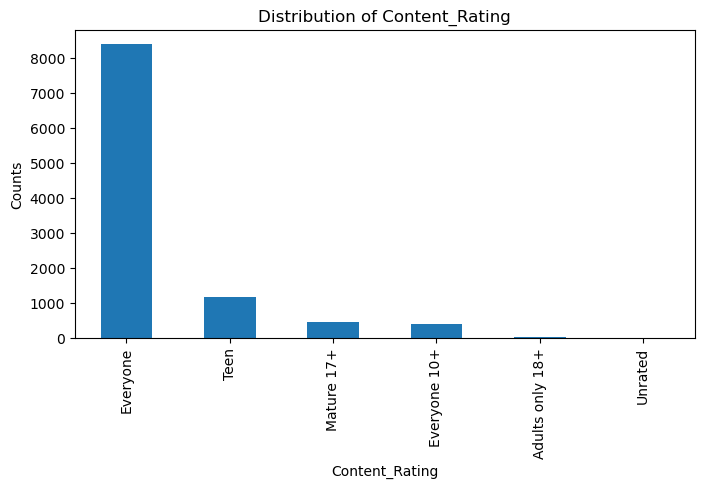

In [86]:
    plt.figure(figsize=(8, 4))
    AppStoreData['Content_Rating'].value_counts().plot(kind='bar')
    plt.title(f'Distribution of Content_Rating')
    plt.xlabel("Content_Rating")
    plt.ylabel('Counts')
    plt.show()

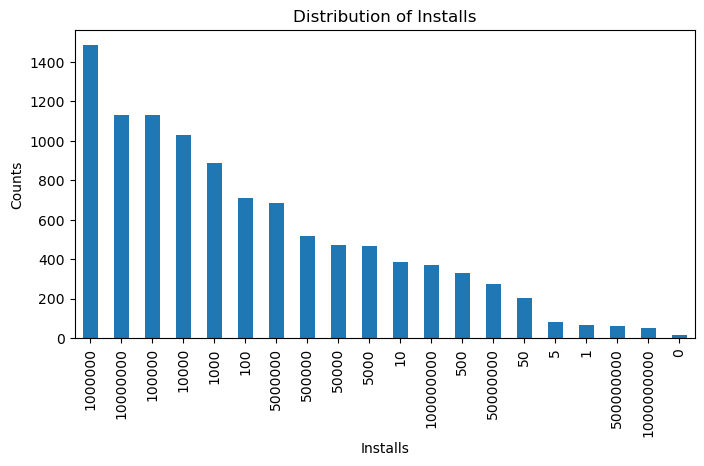

In [87]:
    plt.figure(figsize=(8, 4))
    AppStoreData['Installs'].value_counts().plot(kind='bar')
    plt.title(f'Distribution of Installs')
    plt.xlabel("Installs")
    plt.ylabel('Counts')
    plt.show()

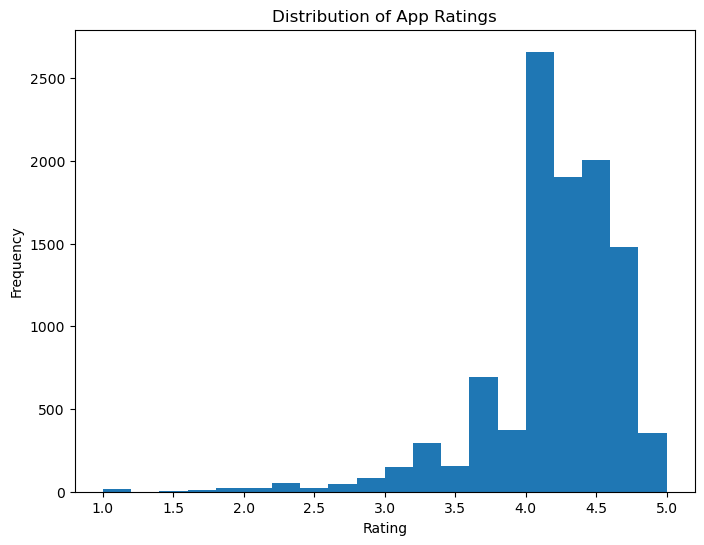

In [88]:
#now we can visualise the data
AppStoreData['Rating'].plot(kind='hist', bins=20, figsize=(8, 6))
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

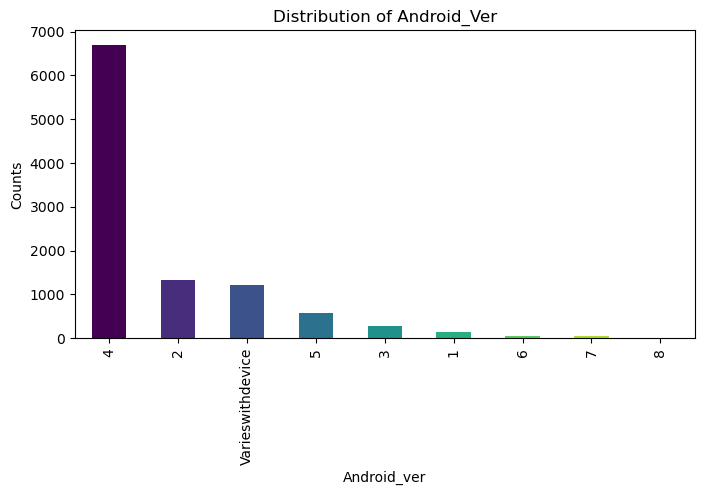

In [89]:

plt.figure(figsize=(8, 4))
AppStoreData['Android_Ver'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Android_Ver')
plt.xlabel('Android_ver')
plt.ylabel('Counts')
plt.show()

## Encoding Categorical Data

In [90]:
#nominal features
Nominal_features = ["App", "Category", "Genres", "Current_Ver", "Android_Ver"]

#ordinal features
Ordinal_features =["Reviews","Size","Installs","Type","Price","Content_Rating","Last_Updated_Month", "Last_Updated_Year"]

In [91]:
AppStoreData.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Current_Ver,Android_Ver,Last_Updated_Year,Last_Updated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Everyone,Art & Design,1.0.0,4,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,Everyone,Art & Design,2.0.0,4,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Everyone,Art & Design,1.2.4,4,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,Teen,Art & Design,Varies with device,4,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Everyone,Art & Design,1.1,4,2018,6


In [92]:
Ordinal_label = ["Reviews","Size","Installs","Type","Price","Content_Rating","Last_Updated_Month", "Last_Updated_Year"]
le = LabelEncoder()

for label in Ordinal_label:
    AppStoreData[label] = le.fit_transform(AppStoreData[label])

In [93]:
AppStoreData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Current_Ver,Android_Ver,Last_Updated_Year,Last_Updated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,378,5,0,0,1,Art & Design,1.0.0,4,8,0
1,Coloring book moana,ART_AND_DESIGN,3.9,725,373,16,0,0,1,Art & Design,2.0.0,4,8,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,3948,356,17,0,0,1,Art & Design,1.2.4,4,8,7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,4564,384,18,0,0,4,Art & Design,Varies with device,4,8,5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,725,297,6,0,0,1,Art & Design,1.1,4,8,5


In [94]:
encoder = ce.HashingEncoder(n_components=2 , return_df = True)
#n_components: int
#how many bits to use to represent the feature. By default, we use 8 bits. For high-cardinality features, consider using up-to 32 bits.
AppStoreData = encoder.fit_transform(AppStoreData)
AppStoreData.head(5)

,col_0,col_1,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated_Year,Last_Updated_Month
0,5,0,4.1,159,378,5,0,0,1,8,0
1,4,1,3.9,725,373,16,0,0,1,8,0
2,4,1,4.7,3948,356,17,0,0,1,8,7
3,3,2,4.5,4564,384,18,0,0,4,8,5
4,5,0,4.3,725,297,6,0,0,1,8,5


# Outlier Detection

In [95]:
# we want to use Statistical Methods
threshold = 3
# identify outliers using z-score method
outliers = AppStoreData[(np.abs(AppStoreData - AppStoreData.mean() / AppStoreData.std()) > threshold).any(axis = 1)]
outliers.head(5)

,col_0,col_1,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated_Year,Last_Updated_Month
0,5,0,4.1,159,378,5,0,0,1,8,0
1,4,1,3.9,725,373,16,0,0,1,8,0
2,4,1,4.7,3948,356,17,0,0,1,8,7
3,3,2,4.5,4564,384,18,0,0,4,8,5
4,5,0,4.3,725,297,6,0,0,1,8,5


In [96]:
threshold = 3
# removing outliers using z-score method
no_outliers = AppStoreData[(np.abs(AppStoreData - AppStoreData.mean() / AppStoreData.std()) <= threshold).any(axis = 1)]
AppStoreData = no_outliers
AppStoreData.head(5)

,col_0,col_1,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated_Year,Last_Updated_Month
0,5,0,4.1,159,378,5,0,0,1,8,0
1,4,1,3.9,725,373,16,0,0,1,8,0
2,4,1,4.7,3948,356,17,0,0,1,8,7
3,3,2,4.5,4564,384,18,0,0,4,8,5
4,5,0,4.3,725,297,6,0,0,1,8,5


In [97]:
AppStoreData.describe()

,col_0,col_1,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated_Year,Last_Updated_Month
count,10355.000000,10355.000000,10355.000000,10355.000000,10355.000000,10355.000000,10355.000000,10355.000000,10355.000000,10355.000000,10355.000000
mean,2.698696,2.301304,4.188375,1804.644616,301.327668,8.591791,0.073781,2.093675,1.455239,7.382810,5.397296
std,1.102788,1.102788,0.484054,1945.534638,138.255029,4.790487,0.261426,9.560353,1.000676,1.112841,2.606390
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,4.100000,32.000000,296.000000,5.000000,0.000000,0.000000,1.000000,7.000000,4.000000
50%,3.000000,2.000000,4.200000,984.000000,360.000000,7.000000,0.000000,0.000000,1.000000,8.000000,6.000000
75%,3.000000,3.000000,4.500000,3427.500000,385.000000,13.000000,0.000000,0.000000,1.000000,8.000000,7.000000
max,5.000000,5.000000,5.000000,6000.000000,459.000000,19.000000,1.000000,91.000000,5.000000,8.000000,11.000000


# Using models


## Linear


## Classification
### Forest clasifer and logisticalRegression.

Data Splitting:

X = AppStoreData.drop('Rating', axis=1) removes the target variable 'Rating' and keeps all the other columns as features.
y = AppStoreData['Rating'] assigns the 'Rating' column as the target variable.
train_test_split splits the data into training (80%) and testing (20%) sets. This helps train models on one portion of the data and evaluate them on unseen data.

In [98]:
from sklearn.model_selection import train_test_split
X = AppStoreData.drop('Rating', axis=1)  # Features (all columns except 'Rating')
y = AppStoreData['Rating']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train are your training data and labels, and X_test and y_test are your testing data and labels


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
Lr = LinearRegression()# default parameters
Lr.fit(X_train , y_train)
scores = cross_val_score(Lr, X_train, y_train, cv=10)
scores.mean()

0.05987015154721013

In [100]:
X_train.head(5)

,col_0,col_1,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated_Year,Last_Updated_Month
9773,1,4,1053,443,6,0,0,4,8,5
1948,3,2,2166,409,7,0,0,3,8,7
1201,3,2,4327,0,17,0,0,1,8,6
4230,3,2,1344,297,16,0,0,1,7,11
4324,2,3,3401,408,17,0,0,1,8,7


In [101]:
#we want to use MinMaxScaler to scale data into a specific scale
#(max - min) / (X.max(axis=0) - X.min(axis=0))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = X.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test) , columns = X.columns)

Feature Scaling:

The MinMaxScaler is applied to scale the features in X_train and X_test to a specific range (usually between 0 and 1). This can improve the performance of certain models by standardizing the range of values for all features.

Random Forest Regressor:

A RandomForestRegressor model is trained using the scaled training data.
Feature importances are extracted from the model, showing which features are most influential in predicting the target variable ('Rating').
A bar plot visualizes these feature importances, allowing you to see the relevance of each feature in predicting the target.

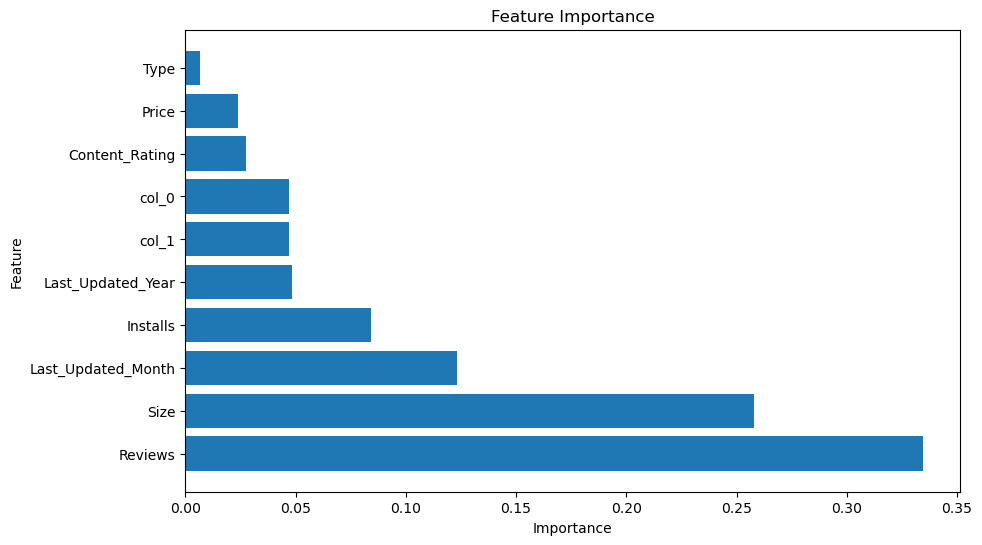

In [102]:
from sklearn.ensemble import RandomForestRegressor
# Create a RandomForestRegressor model (you can also use DecisionTreeRegressor for a single tree)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [103]:
RF = RandomForestRegressor() # default parameters
RF.fit(X_train , y_train)
scores = cross_val_score(RF, X_train, y_train, cv=10)
scores.mean()

0.06768751867852099

In [104]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [105]:
models = ['Logistic Regression', 'Random Forest','SVM','KNN','Naive Bayes','Decision Tree','Gradient Boosting','AdaBoost','Extra Trees']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [106]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN
SVM                 train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Naive Bayes         train          NaN
                    test           NaN
Decision Tree       train          NaN
                    test           NaN
Gradient Boosting   train          NaN
                    test           NaN
AdaBoost            train          NaN
                    test           NaN
Extra Trees         train          NaN
                    test           NaN

In [107]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model with an increased max_iter
lr_clf = LogisticRegression(max_iter=10000)  # You can adjust the value based on your needs

# Train the model on the training data
lr_clf.fit(X_train, y_train_int)

LogisticRegression(max_iter=10000)

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [109]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create classifiers
svm_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier()
nb_clf = GaussianNB()
dt_clf = DecisionTreeClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the models
svm_clf.fit(X_train, y_train_int)
knn_clf.fit(X_train, y_train_int)
nb_clf.fit(X_train, y_train_int)
dt_clf.fit(X_train, y_train_int)
gb_clf.fit(X_train, y_train_int)
ada_clf.fit(X_train, y_train_int)
et_clf.fit(X_train, y_train_int)



ExtraTreesClassifier(random_state=42)

In [110]:
# Evaluate models and store accuracy scores
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

df_metrics_clf.loc['SVM', 'train'] = svm_clf.score(X_train, y_train_int)
df_metrics_clf.loc['SVM', 'test'] = svm_clf.score(X_test, y_test_int)

df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

df_metrics_clf.loc['Naive Bayes', 'train'] = nb_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Naive Bayes', 'test'] = nb_clf.score(X_test, y_test_int)

df_metrics_clf.loc['Decision Tree', 'train'] = dt_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Decision Tree', 'test'] = dt_clf.score(X_test, y_test_int)

df_metrics_clf.loc['Gradient Boosting', 'train'] = gb_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Gradient Boosting', 'test'] = gb_clf.score(X_test, y_test_int)

df_metrics_clf.loc['AdaBoost', 'train'] = ada_clf.score(X_train, y_train_int)
df_metrics_clf.loc['AdaBoost', 'test'] = ada_clf.score(X_test, y_test_int)

df_metrics_clf.loc['Extra Trees', 'train'] = et_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Extra Trees', 'test'] = et_clf.score(X_test, y_test_int)


In [111]:
# Rounding and coverting the accuracies to percentages
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf


accuracy %
model               dataset            
Logistic Regression train         78.81
                    test          77.50
Random Forest       train         99.98
                    test          76.44
SVM                 train         78.86
                    test          77.55
KNN                 train         81.35
                    test          73.97
Naive Bayes         train         58.12
                    test          59.39
Decision Tree       train         99.98
                    test          68.81
Gradient Boosting   train         80.02
                    test          76.68
AdaBoost            train         72.69
                    test          70.98
Extra Trees         train         99.98
                    test          76.53

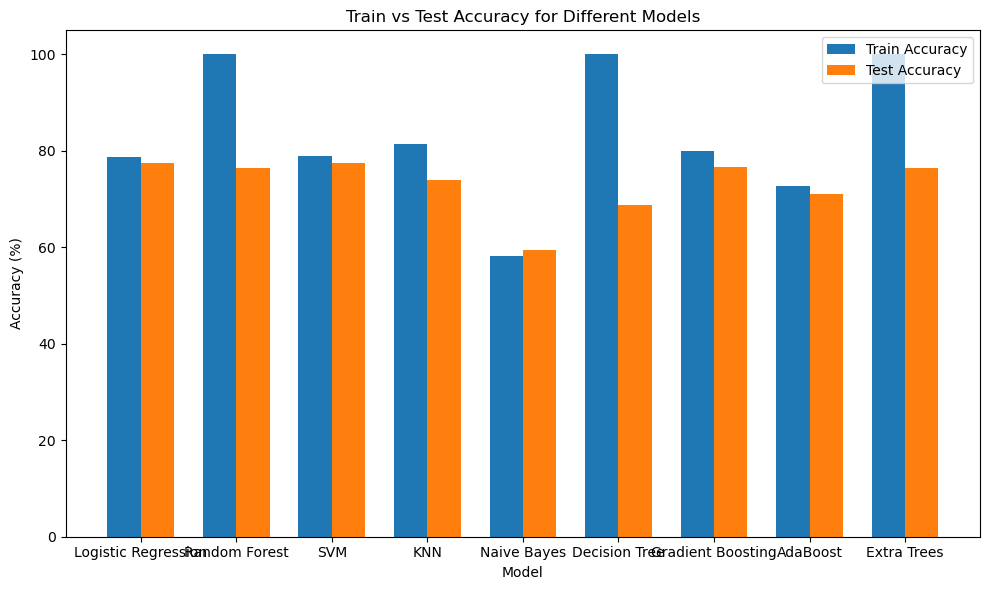

In [112]:
# Create two separate lists for train and test accuracies
train_accuracies = df_metrics_clf.loc[df_metrics_clf.index.get_level_values('dataset') == 'train', 'accuracy %']
test_accuracies = df_metrics_clf.loc[df_metrics_clf.index.get_level_values('dataset') == 'test', 'accuracy %']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for train and test accuracies
bar_width = 0.35
index = range(len(df_metrics_clf.index.unique('model')))
bar_train = ax.bar(index, train_accuracies, bar_width, label='Train Accuracy')
bar_test = ax.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Test Accuracy')

# Labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Train vs Test Accuracy for Different Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df_metrics_clf.index.unique('model'))
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [113]:
latex_table = df_metrics_clf.to_latex( escape=True)
print(latex_table)



\begin{tabular}{llr}
\toprule
 &  & accuracy \% \\
model & dataset &  \\
\midrule
\multirow[t]{2}{*}{Logistic Regression} & train & 78.810000 \\
 & test & 77.500000 \\
\cline{1-3}
\multirow[t]{2}{*}{Random Forest} & train & 99.980000 \\
 & test & 76.440000 \\
\cline{1-3}
\multirow[t]{2}{*}{SVM} & train & 78.860000 \\
 & test & 77.550000 \\
\cline{1-3}
\multirow[t]{2}{*}{KNN} & train & 81.350000 \\
 & test & 73.970000 \\
\cline{1-3}
\multirow[t]{2}{*}{Naive Bayes} & train & 58.120000 \\
 & test & 59.390000 \\
\cline{1-3}
\multirow[t]{2}{*}{Decision Tree} & train & 99.980000 \\
 & test & 68.810000 \\
\cline{1-3}
\multirow[t]{2}{*}{Gradient Boosting} & train & 80.020000 \\
 & test & 76.680000 \\
\cline{1-3}
\multirow[t]{2}{*}{AdaBoost} & train & 72.690000 \\
 & test & 70.980000 \\
\cline{1-3}
\multirow[t]{2}{*}{Extra Trees} & train & 99.980000 \\
 & test & 76.530000 \\
\cline{1-3}
\bottomrule
\end{tabular}



## Clustering

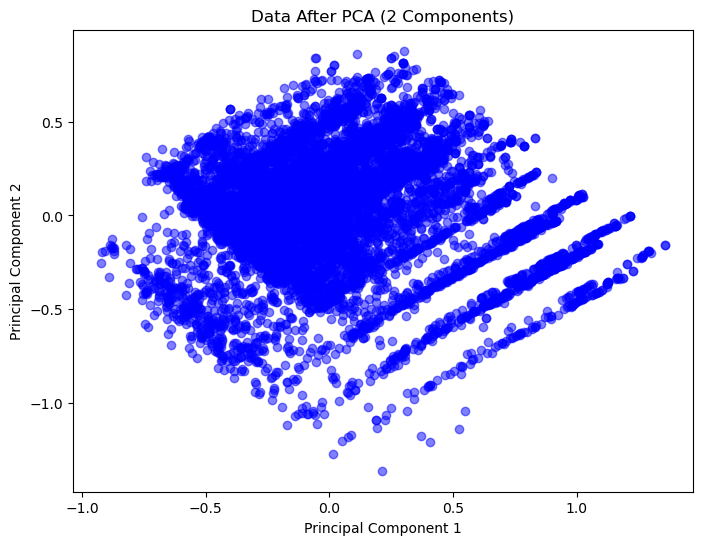

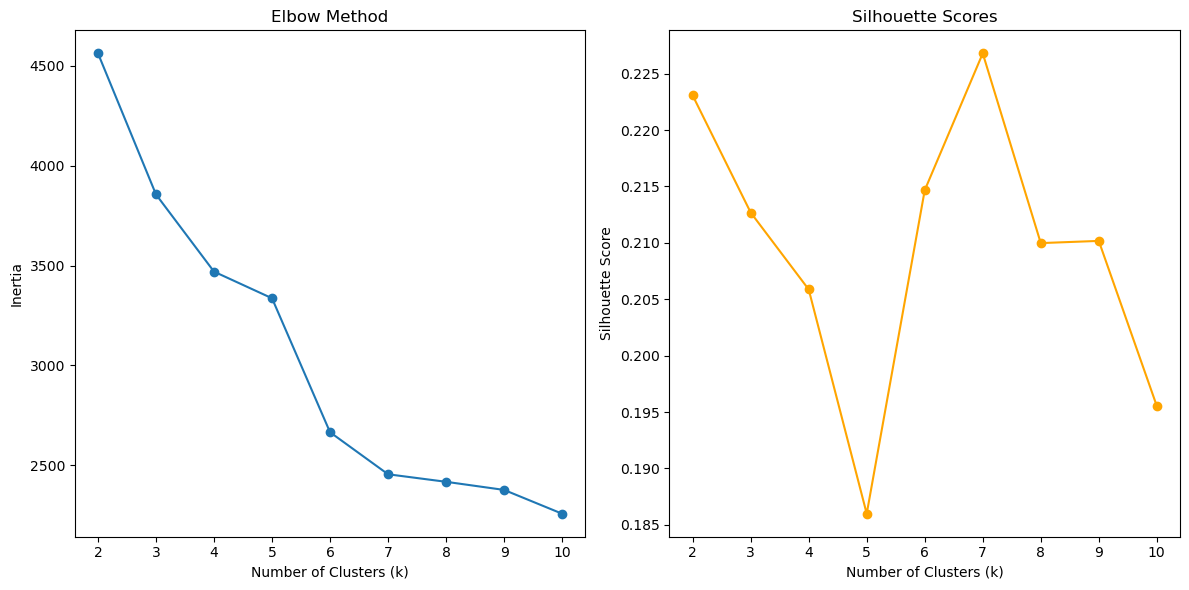

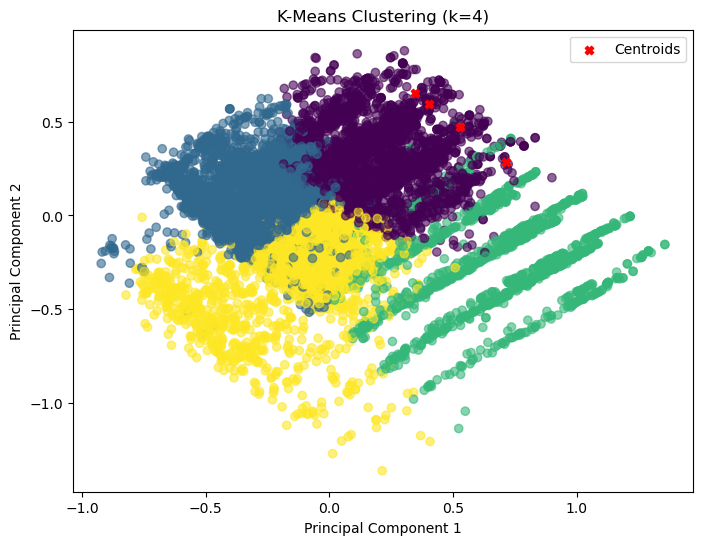

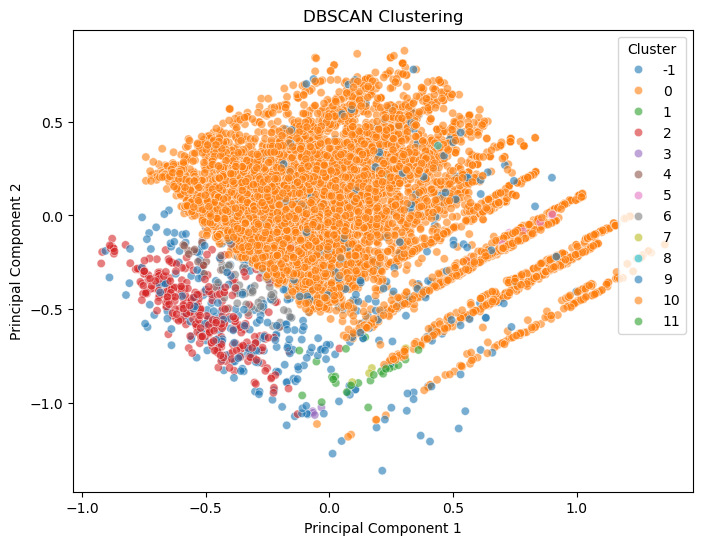

K-Means Cluster Summary:
                   col_0     col_1      Reviews        Size   Installs  \
KMeans_Cluster                                                           
0               2.633179  2.366821  3868.210547  385.043110  11.016936   
1               3.579787  1.420213   522.009309  339.558245   7.261170   
2               1.732488  3.267512  3703.707138    1.995997  10.496331   
3               2.020416  2.979584   449.508407  336.339071   6.929544   

                    Type     Price  Content_Rating  Last_Updated_Year  \
KMeans_Cluster                                                          
0               0.001540  0.020015        1.756736           7.670131   
1               0.010904  0.221809        1.240691           7.238564   
2               0.016011  0.526351        1.537692           7.721147   
3               0.278223  8.008407        1.415132           7.098078   

                Last_Updated_Month  DBSCAN_Cluster  
KMeans_Cluster                        

In [114]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


# Preprocess the data (scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Ensure X is your feature matrix

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Visualize data after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, color='blue')
plt.title('Data After PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# ---- K-Means Clustering ----

# Determine optimal number of clusters using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method and Silhouette Scores
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Elbow Method
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')

# Silhouette Scores
ax[1].plot(k_values, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose optimal k (based on results)
optimal_k = 4  # Adjust based on the elbow point or silhouette scores
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# ---- DBSCAN Clustering ----

# Run DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust parameters as needed
X['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X['DBSCAN_Cluster'], palette='tab10', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# ---- Cluster Analysis ----

# Analyze cluster characteristics for K-Means
kmeans_cluster_summary = X.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Summary:")
print(kmeans_cluster_summary)

# Analyze cluster characteristics for DBSCAN
dbscan_cluster_summary = X.groupby('DBSCAN_Cluster').mean()
print("\nDBSCAN Cluster Summary:")
print(dbscan_cluster_summary)


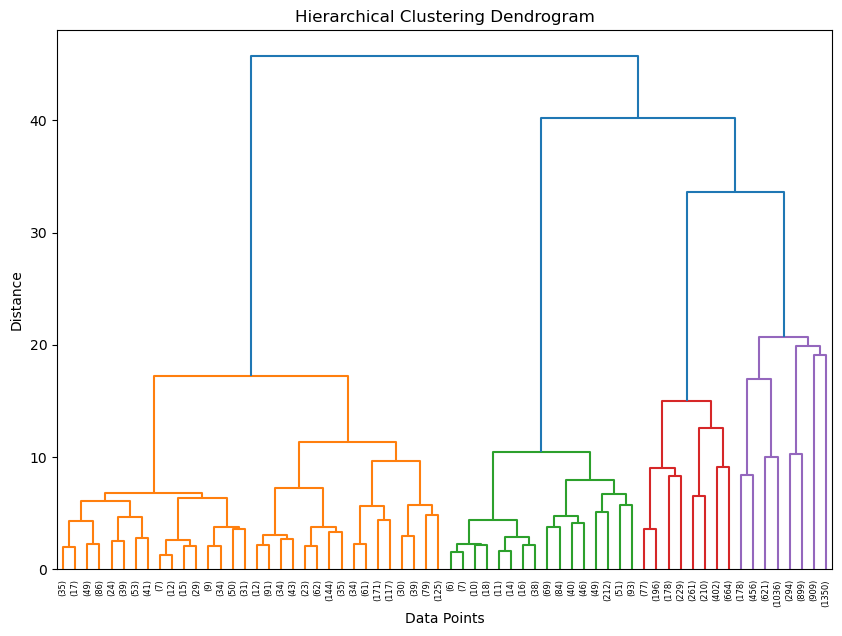

In [115]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns

# Perform hierarchical clustering
linkage_method = 'ward'  # Options: 'ward', 'complete', 'average', 'single'
Z = linkage(X_scaled, method=linkage_method)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)  # Adjust 'p' to limit the tree depth
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Determine clusters from the dendrogram
max_d = 5  # Set the distance threshold to cut the dendrogram
X['HCluster'] = fcluster(Z, max_d, criterion='distance')  # Add hierarchical cluster labels



In [116]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means
kmeans_silhouette = silhouette_score(X_scaled, X['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette * 100:.2f}%")

# Silhouette score for Hierarchical Clustering (dendrogram)
hcluster_silhouette = silhouette_score(X_scaled, X['HCluster'])
print(f"Hierarchical Clustering Silhouette Score: {hcluster_silhouette * 100:.2f}%")


K-Means Silhouette Score: 0.2059
DBSCAN Silhouette Score: 0.0650
